In [2]:
import pandas as pd
import numpy as np
#HALO JEMS AKU FELI
#halo brooo ini epin
#* open file csv
dataFrameTwitter = pd.read_csv('TRANSLATED-covid-sentiment.csv')

#* ilangin kolom2 berikut
columns = ['mentions', 'replies_count', 'conversation_id', 'user_id', 'hashtags']
dataFrameTwitter.drop(columns, inplace=True, axis=1)




"""
#* Convert date and time column to unix timestamp
# This Process converts, and then delete the old date and time columns
# in exchange for a new column (timestamps)
"""

# Declare variable timeStamps untuk ngegabungin dua kolom tersebut
# "2020-05-07 23:58:29"
timeStamps = dataFrameTwitter['date'] + " " + dataFrameTwitter['time']

# Convert String menjadi bentuknya integer!
timeStamps = pd.to_datetime(timeStamps)

# Set data yang udah ada ke kolom timestamps, sekaligus diubah formnya
dataFrameTwitter['timestamps'] = timeStamps.values.astype(np.int64) // (10 ** 8)

# Delete the old values
columns = ['date', 'time']
dataFrameTwitter.drop(columns, inplace=True, axis=1)



"""
#* Print the mean, median, mode of retweets_count and likes_count
"""
print('retweets_count avg =', dataFrameTwitter["retweets_count"].mean())
print('retweets_count median =', dataFrameTwitter["retweets_count"].median())
print('retweets_count mode =', dataFrameTwitter["retweets_count"].mode())
print('\n\n') #ini spasi
print('likes_count avg =', dataFrameTwitter["likes_count"].mean())
print('likes_count median =', dataFrameTwitter["likes_count"].median())
print('likes_count mode =', dataFrameTwitter["likes_count"].mode())
print('\n\n') #ini spasi

retweets_count avg = 2.592136261474722
retweets_count median = 0.0
retweets_count mode = 0    0
dtype: int64



likes_count avg = 7.686100354734761
likes_count median = 0.0
likes_count mode = 0    0
dtype: int64





28858 3330


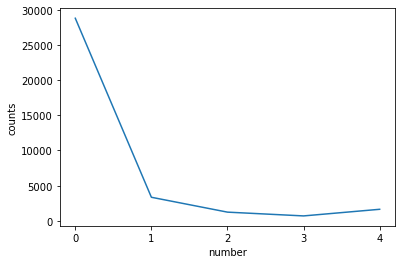

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 

"""
#* Mencoba COUNTIF dan COUNTIFS di kolom likes_count yang nilainya diantara 0 - 5
# Setara dengan di excel: COUNTIFS(XX:YY, kondisi1, kondisi2, ..., kondisi_n) !!
"""

#Tarik data apabila kondisinya data sama dengan 0
#Jumlahin semua yang memenuhi kondisi tersebut

condition1 = (dataFrameTwitter["retweets_count"] == 0) 
total1 = np.sum(condition1) 

condition2 = (dataFrameTwitter["retweets_count"] == 1)
total2 = np.sum(condition2)

condition3 = (dataFrameTwitter["retweets_count"] == 2)
total3 = np.sum(condition3)

condition4 = (dataFrameTwitter["retweets_count"] == 3)
total4 = np.sum(condition4)

condition5 = (dataFrameTwitter["retweets_count"] >=4) & (dataFrameTwitter["retweets_count"] <=10)
total5 = np.sum(condition5)

plotDf = pd.DataFrame(
    [["0",total1],["1",total2],["2",total3],["3",total4],["4",total5]], #kolom
    columns=["number","counts"] #judul kolom
)

ax = sns.lineplot(x="number", y="counts", data=plotDf) #sns adalah seaborn, komponen buat tunjukin graf di python!